<a href="https://colab.research.google.com/github/LECherise/nyu-python-public-policy/blob/master/HW5_Cherise(Chaoer)_Chen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm # package for doing statistics

In [0]:
#Step 1. Load the datasets

In [0]:
# You can use pd.set_option() to make sure you see all the rows and columns in your dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [114]:
drive.mount('/content/drive')
# follow the link it generates, choose your account, and then paste in the authorization code it provides

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
dfc = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
dfb = pd.read_csv('/content/drive/My Drive/Python Homework/Buildings_by_Borough_and_Community_District.csv', header='infer')

In [117]:
dfc.head(30)

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
1,1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0
5,5,5,39882413,08/01/2018 12:01:09 AM,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0
6,6,6,39884833,08/01/2018 12:01:10 AM,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Preci

In [118]:
dfb.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
1,07/31/2018,Bronx,202,NaN,1.0,NaN,NaN,3.0,NaN,6.0
2,07/31/2018,Bronx,203,NaN,2.0,5.0,NaN,5.0,2.0,9.0
3,07/31/2018,Bronx,204,NaN,NaN,2.0,NaN,18.0,NaN,14.0
4,07/31/2018,Bronx,205,NaN,2.0,3.0,NaN,12.0,NaN,5.0


In [0]:
# Step 2 Filter the shelter count dataframe to only keep rows where the value in the 'Report Date' column is '09/30/2019'

In [120]:
set(dfb['Report Date'])

{'01/31/2019',
 '04/10/2019',
 '04/30/2019',
 '05/31/2019',
 '06/30/2019',
 '07/31/2018',
 '08/31/2018',
 '08/31/2019',
 '09/30/2018',
 '09/30/2019',
 '10/31/2018',
 '11/30/2018',
 '12/31/2018'}

In [121]:
dfb.groupby('Report Date').size()


Report Date
01/31/2019    52
04/10/2019    52
04/30/2019    52
05/31/2019    52
06/30/2019    52
07/31/2018    52
08/31/2018    52
08/31/2019    52
09/30/2018    52
09/30/2019    52
10/31/2018    52
11/30/2018    52
12/31/2018    52
dtype: int64

In [122]:
dfb.loc[dfb['Report Date'] == '09/30/2019']

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0
629,09/30/2019,Bronx,206,NaN,1.0,2.0,1.0,3.0,NaN,19.0
630,09/30/2019,Bronx,207,NaN,1.0,5.0,NaN,4.0,NaN,3.0
631,09/30/2019,Bronx,208,NaN,NaN,NaN,NaN,NaN,NaN,1.0
632,09/30/2019,Bronx,209,NaN,NaN,1.0,NaN,5.0,NaN,2.0
633,09/30/2019,Bronx,210,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [123]:
dfb.loc[dfb['Report Date'] == '09/30/2019'].count()

Report Date                 52
Borough                     52
Community District          52
Adult Family Comm Hotel      1
Adult Family Shelter        17
Adult Shelter               32
Adult Shelter Comm Hotel    15
FWC Cluster                 14
FWC Comm Hotel              22
FWC Shelter                 39
dtype: int64

In [0]:
# Step 3 Create a new column in the shelter count dataframe that calculates the sum of all the individual count columns: 'Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter', 
#'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter'

In [125]:
dfb.fillna(0).head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0
1,07/31/2018,Bronx,202,0.0,1.0,0.0,0.0,3.0,0.0,6.0
2,07/31/2018,Bronx,203,0.0,2.0,5.0,0.0,5.0,2.0,9.0
3,07/31/2018,Bronx,204,0.0,0.0,2.0,0.0,18.0,0.0,14.0
4,07/31/2018,Bronx,205,0.0,2.0,3.0,0.0,12.0,0.0,5.0


In [126]:
df_b=dfb.fillna(0)
df_b.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0
1,07/31/2018,Bronx,202,0.0,1.0,0.0,0.0,3.0,0.0,6.0
2,07/31/2018,Bronx,203,0.0,2.0,5.0,0.0,5.0,2.0,9.0
3,07/31/2018,Bronx,204,0.0,0.0,2.0,0.0,18.0,0.0,14.0
4,07/31/2018,Bronx,205,0.0,2.0,3.0,0.0,12.0,0.0,5.0


In [0]:
df_b_sum = ['Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter']

In [0]:
df_b['Sum'] = df_b[df_b_sum].sum(axis=1)

In [129]:
df_b.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,Sum
0,07/31/2018,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0,15.0
1,07/31/2018,Bronx,202,0.0,1.0,0.0,0.0,3.0,0.0,6.0,10.0
2,07/31/2018,Bronx,203,0.0,2.0,5.0,0.0,5.0,2.0,9.0,23.0
3,07/31/2018,Bronx,204,0.0,0.0,2.0,0.0,18.0,0.0,14.0,34.0
4,07/31/2018,Bronx,205,0.0,2.0,3.0,0.0,12.0,0.0,5.0,22.0


In [0]:
# Step 4 (311 dataset=dfc) From the 311 dataset, create a subset of all the 311 requests where complaint_type == 'Homeless Person Assistance'

In [0]:
dfc.loc[dfc['complaint_type'] == 'Homeless Person Assistance']

In [0]:
dfc_sub = dfc.loc[dfc['complaint_type'] == 'Homeless Person Assistance']

In [160]:
dfc_sub.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
46,46,46,39887175,08/01/2018 12:15:12 AM,08/01/2018 01:29:09 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10016,478 THIRD AVENUE,THIRD AVENUE,EAST 32 STREET,EAST 33 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:12 AM,The mobile outreach response team offered serv...,08/01/2018 01:29:09 AM,06 MANHATTAN,1.008880e+09,MANHATTAN,990113.0,210611.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.744753,-73.978841,"(40.74475319239264, -73.97884116795397)",106.0
47,47,47,39883411,08/01/2018 12:15:39 AM,08/01/2018 01:33:51 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Residential Building/House,10035,445 EAST 120 STREET,EAST 120 STREET,1 AVENUE,PLEASANT AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:39 AM,The mobile outreach response team went to the ...,08/01/2018 01:33:51 AM,11 MANHATTAN,1.018080e+09,MANHATTAN,1003119.0,229980.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.797898,-73.931850,"(40.797897839118114, -73.93184977463629)",111.0
145,150,150,39881402,08/01/2018 12:59:43 AM,08/01/2018 02:10:40 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10027,624 WEST 125 STREET,WEST 125 STREET,BROADWAY,ST CLAIR PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:59:43 AM,The mobile outreach response team went to the ...,08/01/2018 02:10:40 AM,09 MANHATTAN,1.019950e+09,MANHATTAN,995623.0,236699.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.816352,-73.958912,"(40.81635246371125, -73.95891211015879)",109.0
371,394,394,39888951,08/01/2018 04:10:47 AM,08/01/2018 05:18:59 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10003,115 EAST 14 STREET,EAST 14 STREET,4 AVENUE,IRVING PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 05:10:47 AM,The individual was found and outreach assistan...,08/01/2018 05:18:59 AM,05 MANHATTAN,1.008708e+09,MANHATTAN,987266.0,206735.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.734116,-73.989117,"(40.73411596377878, -73.98911737171056)",105.0


In [0]:
# Step 5 Group the 311 subset by 'borocd' to get the count of 'Homeless Person Assistance' requests per community district

In [161]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

dfc_sub.groupby(['complaint_type', 'borocd']).size().reset_index(name='count').sort_values('count', ascending=False)

,complaint_type,borocd,count
4,Homeless Person Assistance,105.0,3020
6,Homeless Person Assistance,107.0,1684
3,Homeless Person Assistance,104.0,1055
1,Homeless Person Assistance,102.0,965
0,Homeless Person Assistance,101.0,758
5,Homeless Person Assistance,106.0,753
7,Homeless Person Assistance,108.0,633
2,Homeless Person Assistance,103.0,520
25,Homeless Person Assistance,302.0,414
10,Homeless Person Assistance,111.0,373


In [0]:
# Step 6 Merge the homeless 311 request count table (from Step 5) with the shelter count table (from Step 3).

In [0]:
dfc_count = dfc_sub.groupby(['complaint_type', 'borocd']).size().reset_index(name='count').sort_values('count', ascending=False)

In [0]:
merged_data = pd.merge(dfc_count,df_b, left_on = 'borocd', right_on = 'Community District',how = 'left').fillna(0)

In [164]:
merged_data.head(40)

,complaint_type,borocd,count,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,Sum
0,Homeless Person Assistance,105.0,3020,07/31/2018,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0
1,Homeless Person Assistance,105.0,3020,08/31/2018,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0
2,Homeless Person Assistance,105.0,3020,09/30/2018,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0
3,Homeless Person Assistance,105.0,3020,10/31/2018,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0
4,Homeless Person Assistance,105.0,3020,11/30/2018,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0
5,Homeless Person Assistance,105.0,3020,12/31/2018,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0
6,Homeless Person Assistance,105.0,3020,01/31/2019,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0
7,Homeless Person Assistance,105.0,3020,04/10/2019,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0
8,Homeless Person Assistance,105.0,3020,06/30/2019,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0
9,Homeless Person Assistance,105.0,3020,05/31/2019,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0


In [0]:
# Step 7. Produce a scatter plot of the data using the matplotlib package. 
# What is your initial impression on whether there is a correlation between number of shelters and count of 311 homeless service requests?
# Answer: My initial impression is that theris a negative relationship between number of shelters and count of 311 homeless service requests.

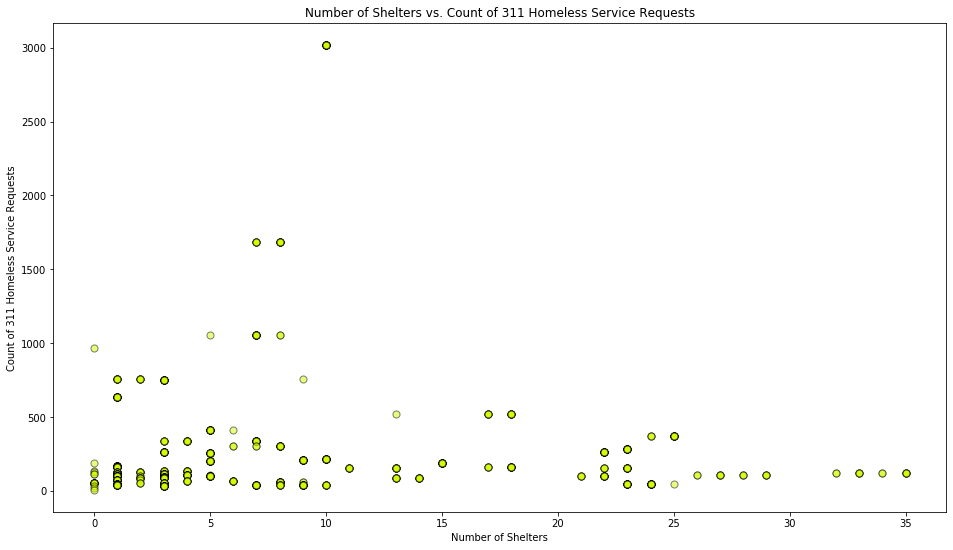

In [166]:
x = np.array(merged_data['Sum'])
y = np.array(merged_data['count'])

# define the styling of the scatter plot
color = '#d3fc03' # color of the circle. hex color picker: https://www.google.com/search?q=color+picker
area = 50 # area of the circle in pixels

plt.figure(figsize=(16, 9))

plt.scatter(x, y, s=area, c=color, edgecolors='black', alpha=0.5) 
# s: size, c: color
# edgecolors: outline color of the marker
# alpha: transparency. 0 is 100% transparent. 1 is 100% opaque

plt.title('Number of Shelters vs. Count of 311 Homeless Service Requests')
plt.xlabel('Number of Shelters')
plt.ylabel('Count of 311 Homeless Service Requests')

plt.show()

In [167]:
merged_data['count'].nlargest(20)

0     3020
1     3020
2     3020
3     3020
4     3020
5     3020
6     3020
7     3020
8     3020
9     3020
10    3020
11    3020
12    3020
13    1684
14    1684
15    1684
16    1684
17    1684
18    1684
19    1684
Name: count, dtype: int64

In [168]:
df_b['Sum'].nlargest(30)

55     35.0
107    35.0
159    35.0
211    35.0
315    35.0
3      34.0
263    34.0
367    33.0
419    33.0
471    33.0
523    33.0
575    32.0
627    32.0
5      29.0
57     29.0
109    29.0
161    29.0
213    28.0
265    28.0
317    28.0
369    27.0
421    27.0
473    27.0
525    27.0
577    26.0
629    26.0
77     25.0
193    25.0
245    25.0
297    25.0
Name: Sum, dtype: float64

In [0]:
# Step 8. Use np.corrcoef(x, y) to 
#identify the correlation coefficient between count of total shelter buildings and count of homeless requests per community district.

In [170]:
#determine the correlation coefficient using the np.corrcoef() function from numpy

x = np.array(merged_data['Sum'])
y = np.array(merged_data['count'])

# produces a matrix of the correlation coefficients
np.corrcoef(x, y)

array([[ 1.        , -0.01176999],
       [-0.01176999,  1.        ]])

In [0]:
# Step 9. Perform a linear regression with count of total shelter buildings as the independent variable 
# and count of homeless requests as the dependent variable

In [171]:
# Note that y is the first argument, before x. This is different than plotting and the correlation function.

# y = dependent variable (# of 311 requests)
y = np.array(merged_data['count'])

# x = independent variable (population) with a constant added
x = np.array(merged_data['Sum'])
x = sm.add_constant(x)

print(x)

model = sm.OLS(y, x).fit()

# Print out the statistics

print(model.summary())

[[ 1. 10.]
 [ 1. 10.]
 [ 1. 10.]
 ...
 [ 1.  3.]
 [ 1.  0.]
 [ 1.  0.]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.09435
Date:                Tue, 26 Nov 2019   Prob (F-statistic):              0.759
Time:                        20:32:52   Log-Likelihood:                -5183.4
No. Observations:                 683   AIC:                         1.037e+04
Df Residuals:                     681   BIC:                         1.038e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [172]:
p = model.params # intercept and coefficient
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

parameters: [293.09715299  -0.6601903 ]
R2: 0.00013853257464346846


In [173]:
yilabel = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

y = -0.66x + 293.1; R2 = 0.0


In [0]:
#Step 10. Produce a scatter plot of the data with the line of best fit from your linear regression using the matplotlib package

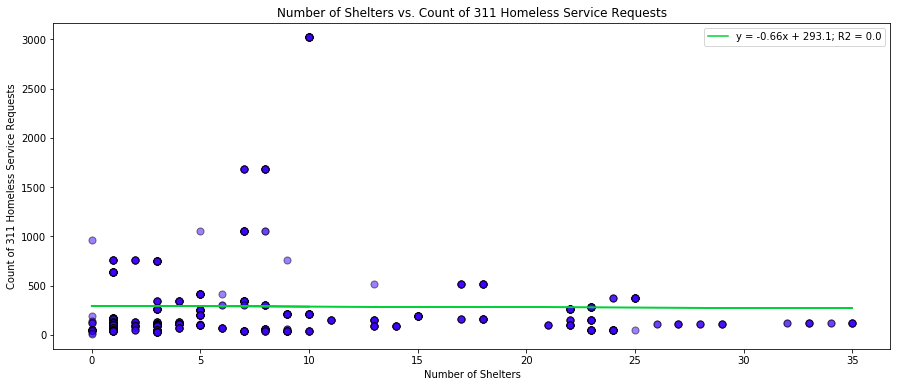

In [174]:
x_dummy = np.array(merged_data['Sum'])

plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_data['Sum']), # x
    np.array(merged_data['count']), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) 

plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#00d138', # lighter green
    label=label)

plt.title('Number of Shelters vs. Count of 311 Homeless Service Requests')
plt.xlabel('Number of Shelters')
plt.ylabel('Count of 311 Homeless Service Requests')
plt.legend()

plt.show()

In [0]:
#Step 11: Write a sentence or two explaining the results of your analysis. 
#What do the numbers and chart tell you about the relationship between concentration of homeless shelters vs. frequency of 311 requests related to homelessness?

In [0]:
#Answer: There is no relationship between concentration of homeless shelters and frequency of 311 requests related to homelessness.